In [2]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [3]:
tickers = ["BYDDY", "GELYF", "F", "TM"]

end_date = datetime.datetime.now()
start_date = end_date - datetime.timedelta(days=5*365)

stocks_data = pd.DataFrame()

In [4]:
for stock in tickers:
    try:
        print(f"Mengunduh data saham {stock}")
        data = yf.download(stock, start=start_date, end=end_date, auto_adjust=False)
        stocks_data[stock] = data['Adj Close']
        print(f"Berhasil mengunduh data saham {stock}")
    except:
        print(f"Gagal mengunduh saham {stock}")

Mengunduh data saham BYDDY


[*********************100%***********************]  1 of 1 completed


Berhasil mengunduh data saham BYDDY
Mengunduh data saham GELYF


[*********************100%***********************]  1 of 1 completed


Berhasil mengunduh data saham GELYF
Mengunduh data saham F


[*********************100%***********************]  1 of 1 completed


Berhasil mengunduh data saham F
Mengunduh data saham TM


[*********************100%***********************]  1 of 1 completed

Berhasil mengunduh data saham TM


In [5]:
null_data = stocks_data.isna().sum()
null_data

BYDDY    0
GELYF    0
F        0
TM       0
dtype: int64

In [6]:
count_data = stocks_data.count()
count_data

BYDDY    1254
GELYF    1254
F        1254
TM       1254
dtype: int64

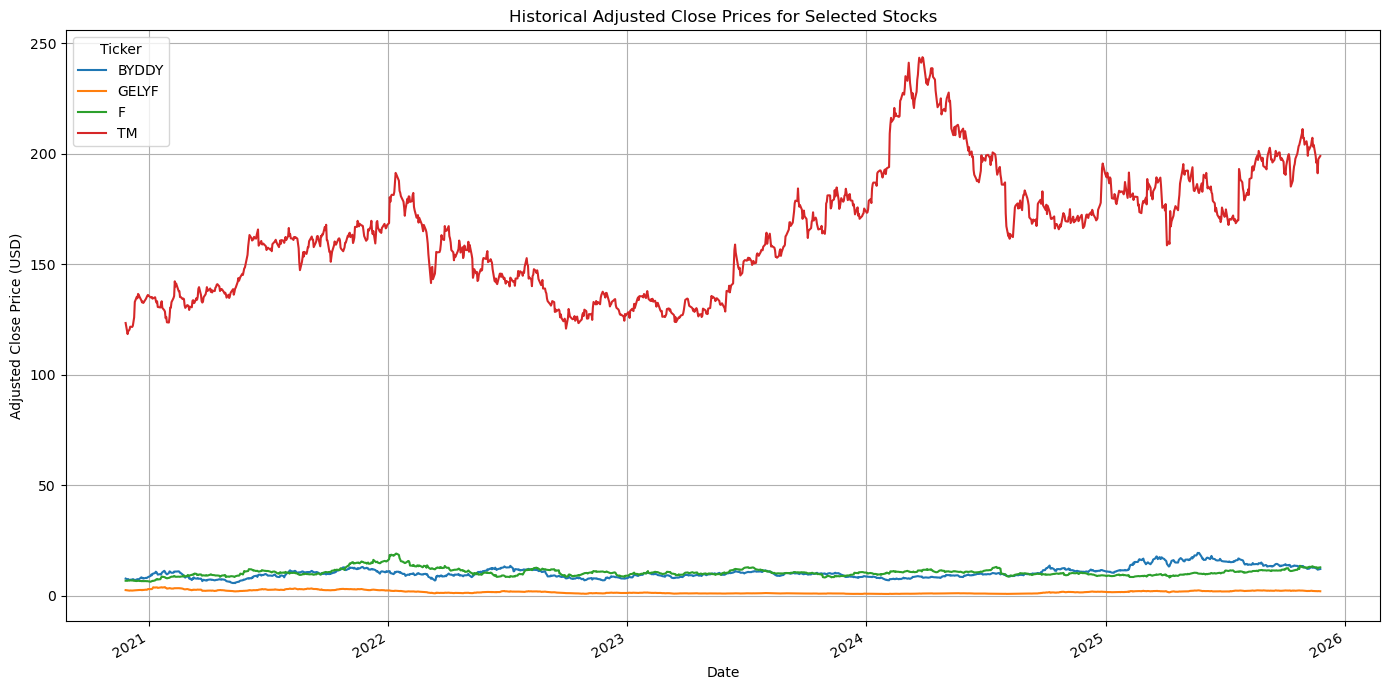

In [7]:
plt.figure(figsize=(14, 7))
stocks_data.plot(ax=plt.gca())
plt.title('Historical Adjusted Close Prices for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price (USD)')
plt.legend(title='Ticker')
plt.grid(True)
plt.tight_layout()
plt.show()